In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [19]:
# Load the dataset
data = pd.read_csv('walmart.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [20]:
# Exploratory Data Analysis (EDA)
print("Data Shape:")
print(data.shape)


Data Shape:
(6435, 8)


In [21]:
print("\nData Info:")
print(data.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [22]:
print("\nData Description:")
print(data.describe())


Data Description:
             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.2328

In [23]:
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [24]:
print("\nUnique Values:")
print(data.nunique())


Unique Values:
Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64



Data Distribution:


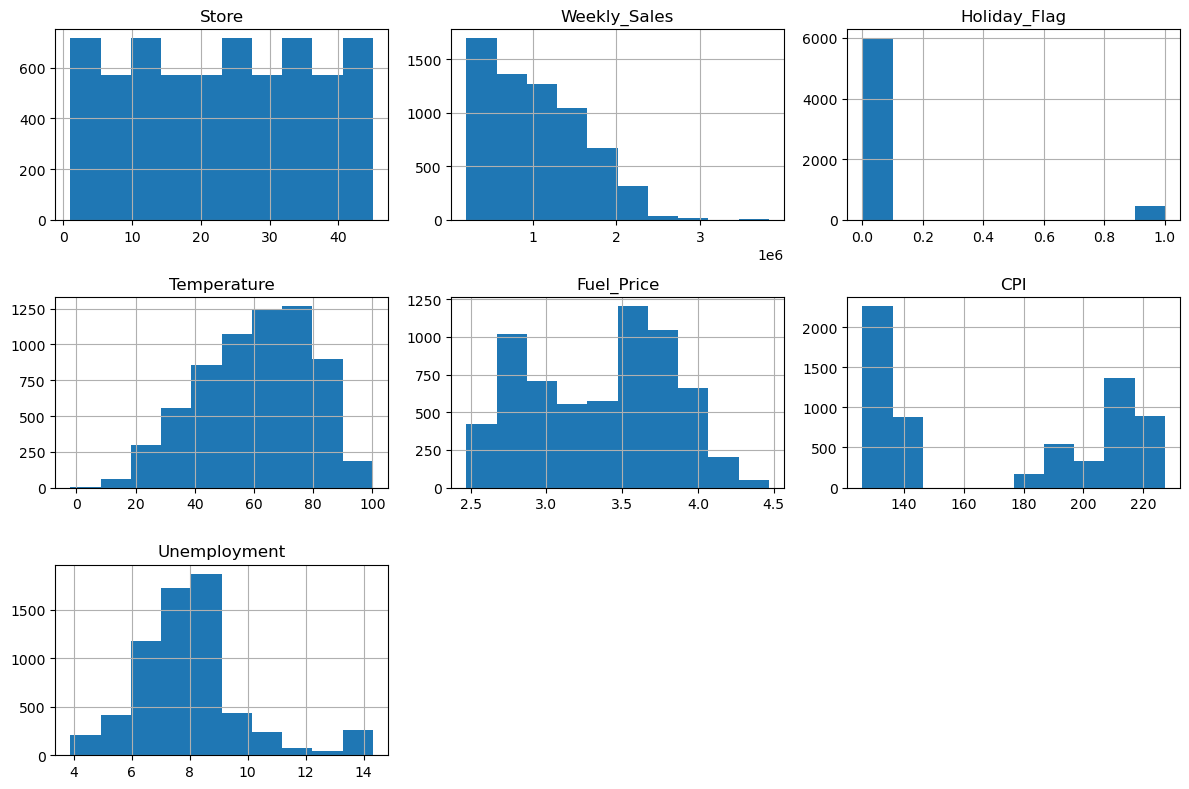

In [25]:
print("\nData Distribution:")
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

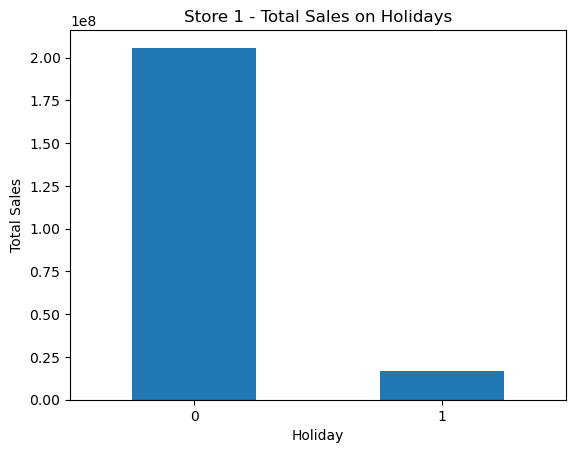

Store 1 - Correlation between Standardized Temperature and Standardized Sales: -0.22270055855381082


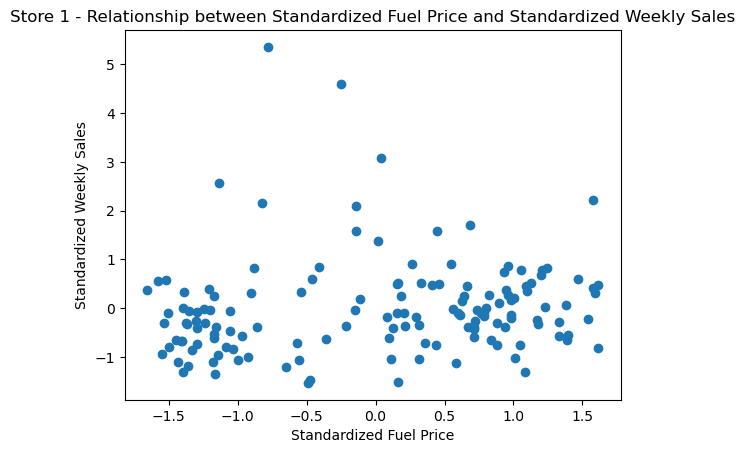

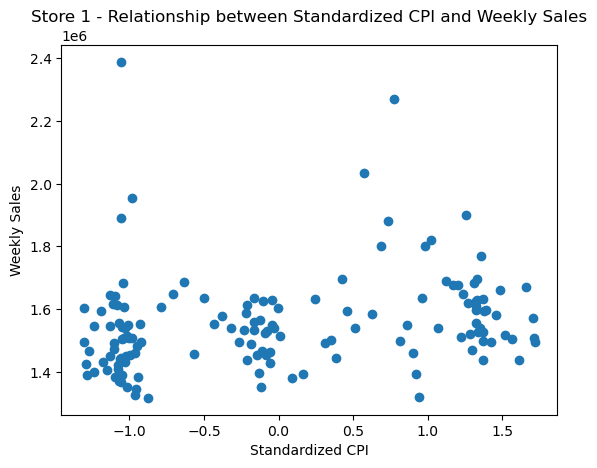

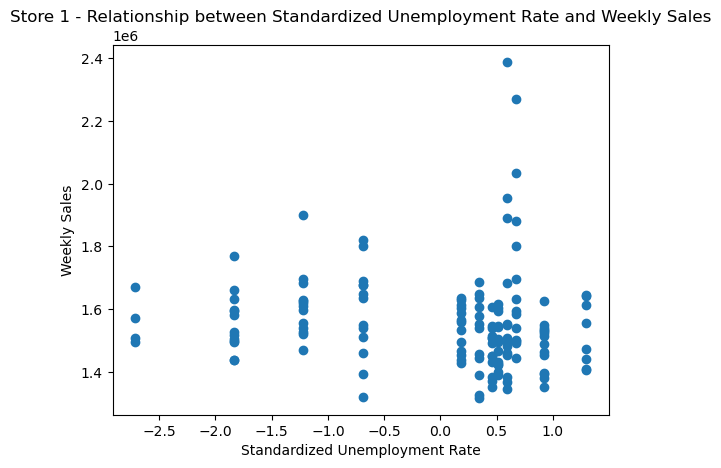

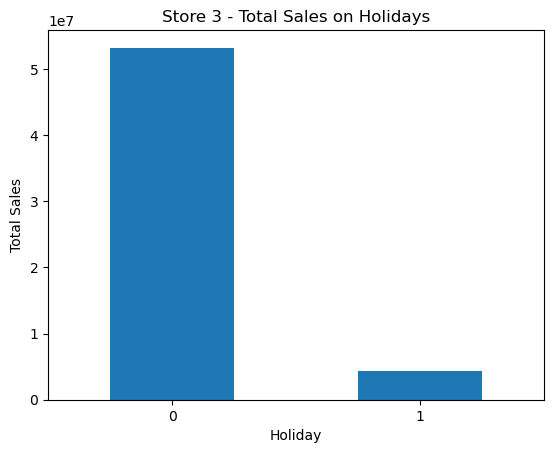

Store 3 - Correlation between Standardized Temperature and Standardized Sales: -0.37752429358720924


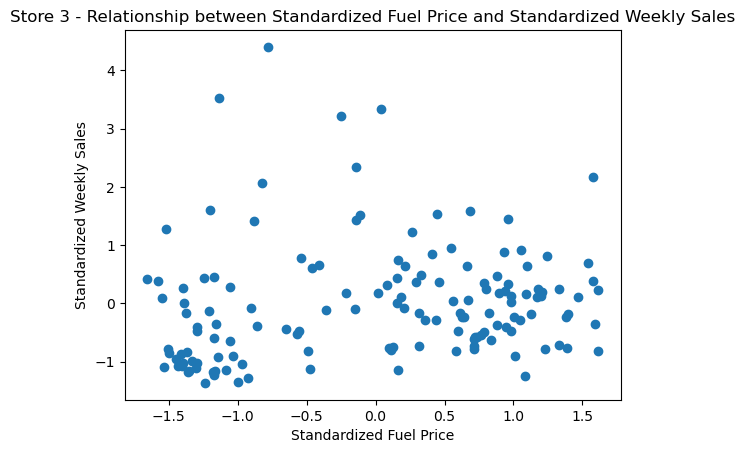

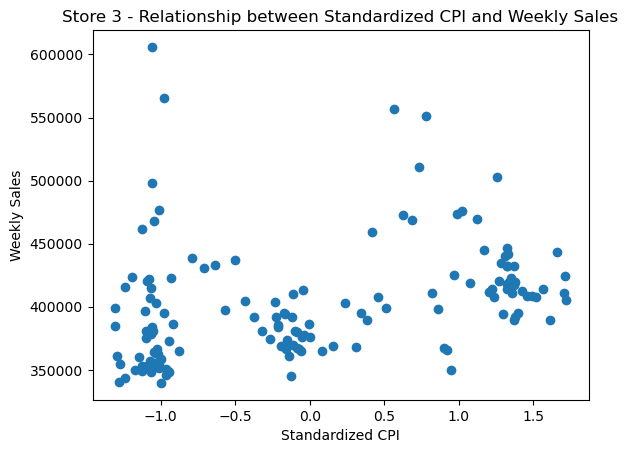

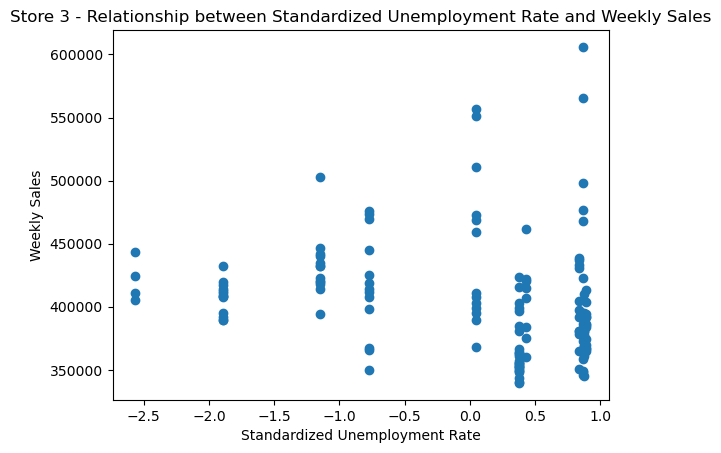

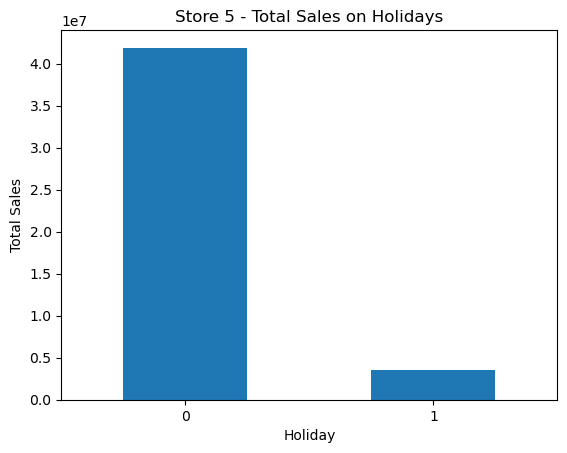

Store 5 - Correlation between Standardized Temperature and Standardized Sales: -0.17551687386901316


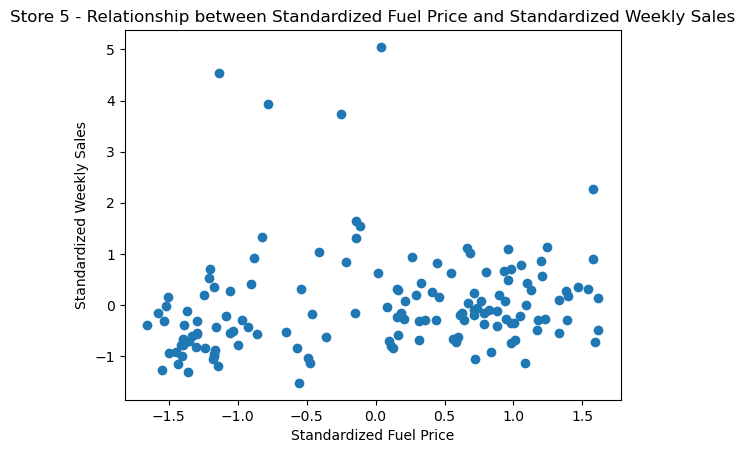

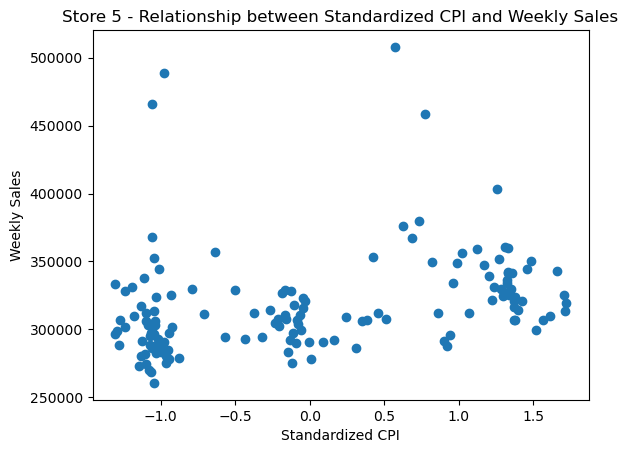

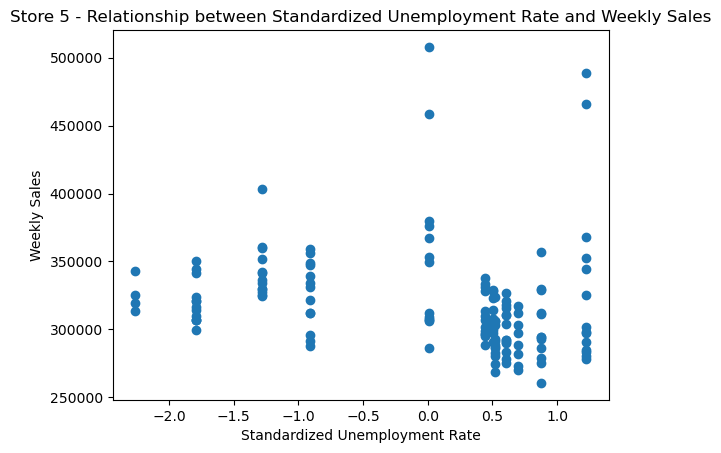

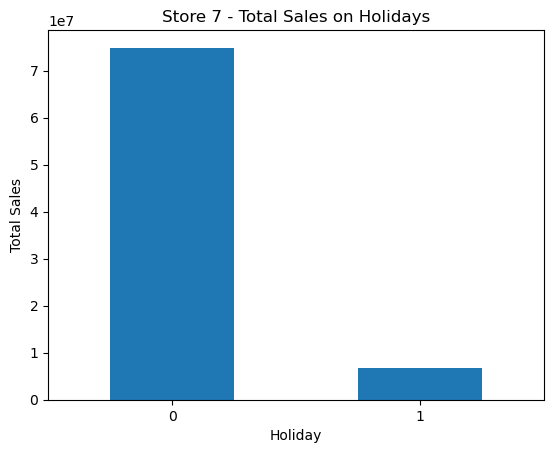

Store 7 - Correlation between Standardized Temperature and Standardized Sales: 0.01507746259919497


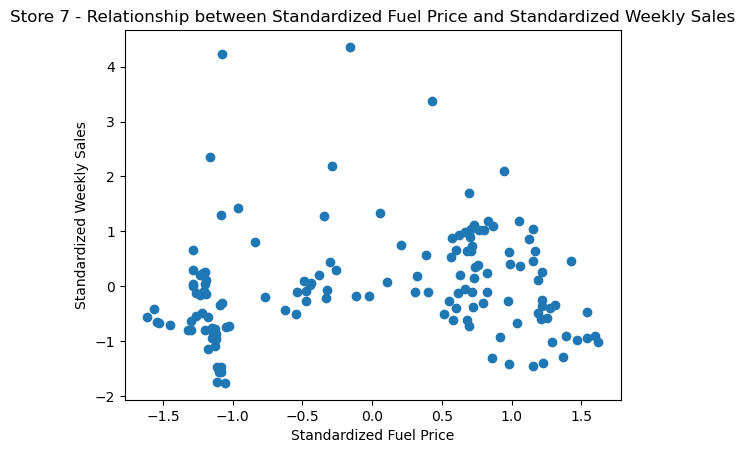

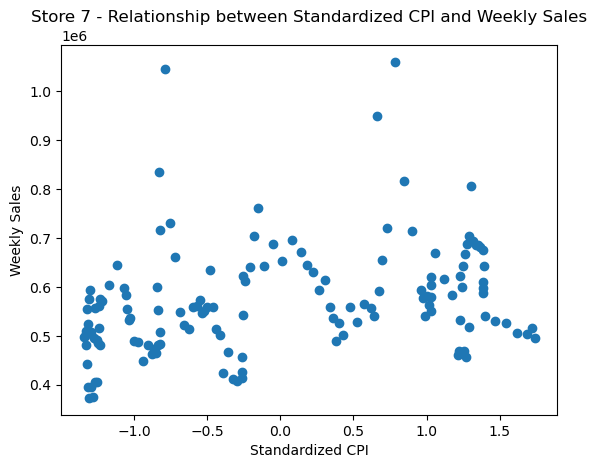

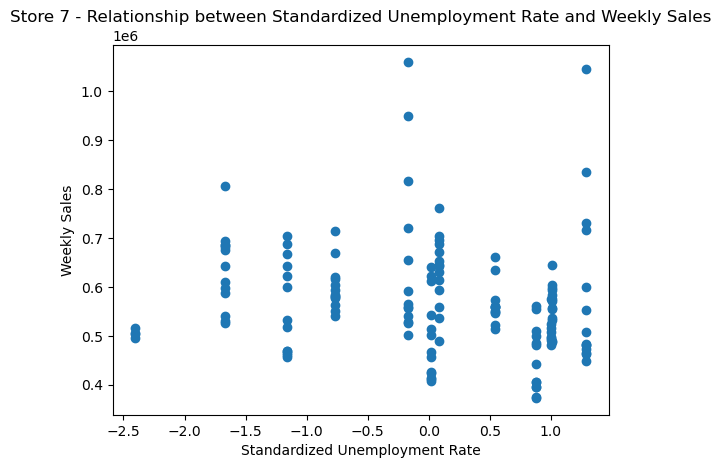

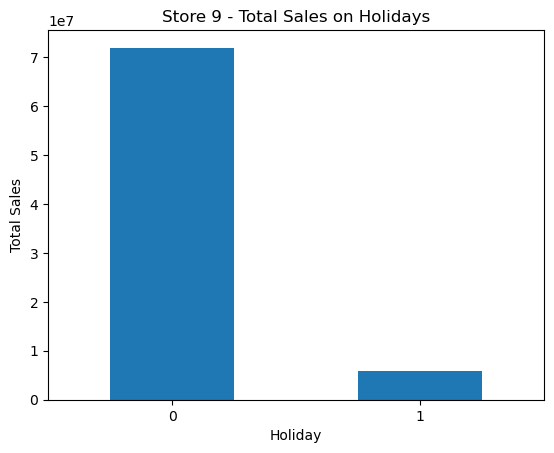

Store 9 - Correlation between Standardized Temperature and Standardized Sales: -0.2083433224222009


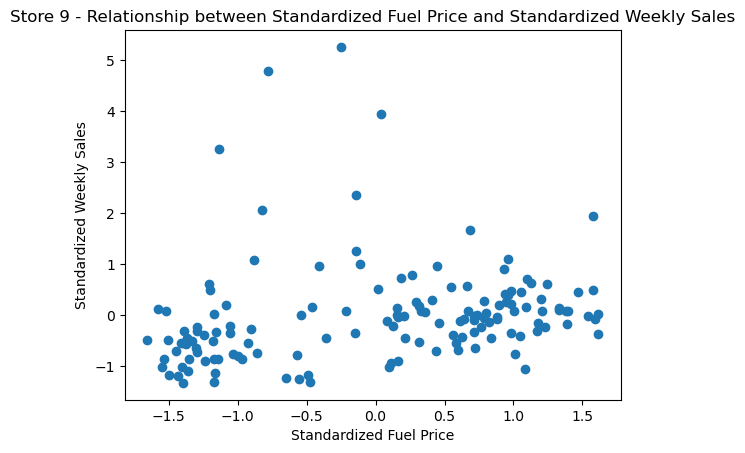

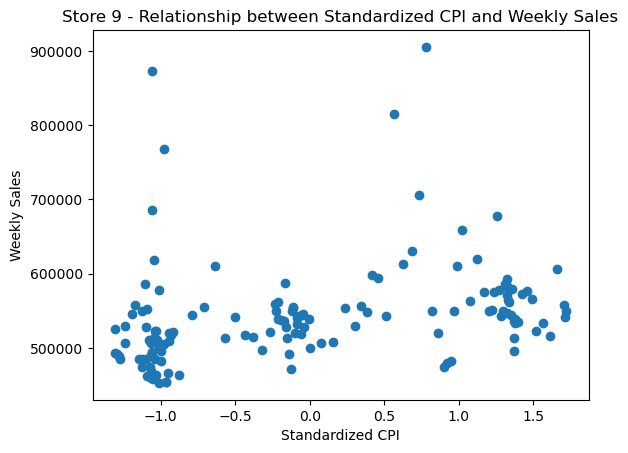

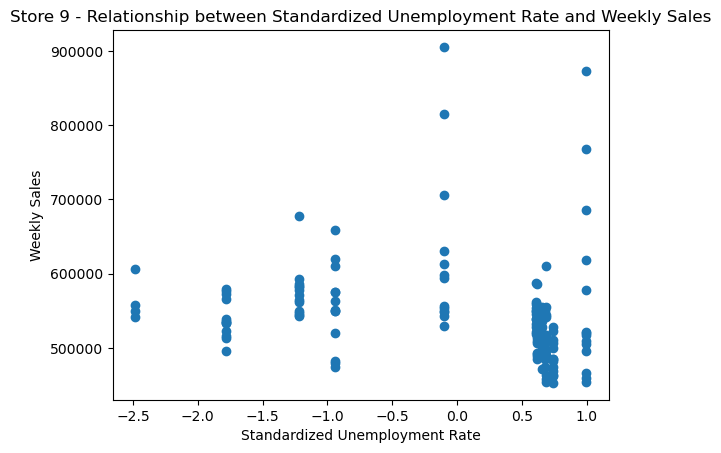

In [74]:
# Explore the data for random 5 stores
stores = [1, 3, 5, 7, 9]

for store in stores:
    store_data = data[data['Store'] == store].copy()

    # Analyze the impact of holidays on sales
    holiday_sales = store_data.groupby('Holiday_Flag')['Weekly_Sales'].sum()
    holiday_sales.plot(kind='bar', rot=0)
    plt.xlabel('Holiday')
    plt.ylabel('Total Sales')
    plt.title(f'Store {store} - Total Sales on Holidays')
    plt.show()

    # Standardize the temperature and sales columns
    scaler = StandardScaler()
    store_data.loc[:, 'Temperature_Standardized'] = scaler.fit_transform(store_data['Temperature'].values.reshape(-1, 1))
    store_data.loc[:, 'Weekly_Sales_Standardized'] = scaler.fit_transform(store_data['Weekly_Sales'].values.reshape(-1, 1))
    
    # Calculate the correlation coefficient
    correlation = store_data['Temperature_Standardized'].corr(store_data['Weekly_Sales_Standardized'])
    print(f"Store {store} - Correlation between Standardized Temperature and Standardized Sales: {correlation}")

    # Standardize the 'Fuel_Price' and 'Weekly_Sales' variables
    store_data['Fuel_Price_Standardized'] = scaler.fit_transform(store_data['Fuel_Price'].values.reshape(-1, 1))
    store_data['Weekly_Sales_Standardized'] = scaler.fit_transform(store_data['Weekly_Sales'].values.reshape(-1, 1))

    # Analyze the impact of fuel price on sales
    plt.scatter(store_data['Fuel_Price_Standardized'], store_data['Weekly_Sales_Standardized'])
    plt.xlabel('Standardized Fuel Price')
    plt.ylabel('Standardized Weekly Sales')
    plt.title(f'Store {store} - Relationship between Standardized Fuel Price and Standardized Weekly Sales')
    plt.show()
    
    # Standardize the 'CPI' and 'Unemployment' variables
    store_data['CPI_Standardized'] = scaler.fit_transform(store_data['CPI'].values.reshape(-1, 1))
    store_data['Unemployment_Standardized'] = scaler.fit_transform(store_data['Unemployment'].values.reshape(-1, 1))

    # Analyze the relationship between CPI and sales
    plt.scatter(store_data['CPI_Standardized'], store_data['Weekly_Sales'])
    plt.xlabel('Standardized CPI')
    plt.ylabel('Weekly Sales')
    plt.title(f'Store {store} - Relationship between Standardized CPI and Weekly Sales')
    plt.show()

    # Analyze the relationship between unemployment rate and sales
    plt.scatter(store_data['Unemployment_Standardized'], store_data['Weekly_Sales'])
    plt.xlabel('Standardized Unemployment Rate')
    plt.ylabel('Weekly Sales')
    plt.title(f'Store {store} - Relationship between Standardized Unemployment Rate and Weekly Sales')
    plt.show()


In [90]:
# List to store the evaluation metrics for each store
evaluation_metrics = []

# Iterate over each store
for store in stores:
    store_data = data[data['Store'] == store].copy()
    store_data.drop('Date', axis=1, inplace=True)

    # Split the data into features and target variable
    X = store_data.drop('Weekly_Sales', axis=1)
    y = store_data['Weekly_Sales']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the scaled data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Linear Regression
    lr_regressor = LinearRegression()
    lr_regressor.fit(X_train, y_train)
    lr_predictions = lr_regressor.predict(X_test)
    lr_mae = mean_absolute_error(y_test, lr_predictions)
    lr_mse = mean_squared_error(y_test, lr_predictions)
    lr_rmse = np.sqrt(lr_mse)

    # Gradient Boosting Regressor
    gb_regressor = GradientBoostingRegressor(random_state=42)
    gb_regressor.fit(X_train, y_train)
    gb_predictions = gb_regressor.predict(X_test)
    gb_mae = mean_absolute_error(y_test, gb_predictions)
    gb_mse = mean_squared_error(y_test, gb_predictions)
    gb_rmse = np.sqrt(gb_mse)

    # Support Vector Regression
    svr_regressor = SVR()
    svr_regressor.fit(X_train, y_train)
    svr_predictions = svr_regressor.predict(X_test)
    svr_mae = mean_absolute_error(y_test, svr_predictions)
    svr_mse = mean_squared_error(y_test, svr_predictions)
    svr_rmse = np.sqrt(svr_mse)

    # Random Forest Regressor
    rf_regressor = RandomForestRegressor(random_state=42)
    rf_regressor.fit(X_train, y_train)
    rf_predictions = rf_regressor.predict(X_test)
    rf_mae = mean_absolute_error(y_test, rf_predictions)
    rf_mse = mean_squared_error(y_test, rf_predictions)
    rf_rmse = np.sqrt(rf_mse)

    # ARIMA Model
    y_train_reset_index = y_train.reset_index(drop=True)
    model = ARIMA(endog=y_train_reset_index)
    arima_model = model.fit()
    arima_predictions = arima_model.predict(start=len(y_train_reset_index), end=len(y_train_reset_index) + len(y_test) - 1)
    arima_mae = mean_absolute_error(y_test, arima_predictions)
    arima_mse = mean_squared_error(y_test, arima_predictions)
    arima_rmse = np.sqrt(arima_mse)
    
    # Store the evaluation metrics for the store
    evaluation_metrics.append({
        'Store': store,
        'LR_MAE': lr_mae,
        'LR_MSE': lr_mse,
        'LR_RMSE': lr_rmse,
        'GB_MAE': gb_mae,
        'GB_MSE': gb_mse,
        'GB_RMSE': gb_rmse,
        'SVR_MAE': svr_mae,
        'SVR_MSE': svr_mse,
        'SVR_RMSE': svr_rmse,
        'RF_MAE': rf_mae,
        'RF_MSE': rf_mse,
        'RF_RMSE': rf_rmse,
        'ARIMA_MAE': arima_mae,
        'ARIMA_MSE': arima_mse,
        'ARIMA_RMSE': arima_rmse
    })


In [91]:
evaluation_metrics

[{'Store': 1,
  'LR_MAE': 116306.56383583389,
  'LR_MSE': 23347724545.574135,
  'LR_RMSE': 152799.6222036368,
  'GB_MAE': 117139.84997130308,
  'GB_MSE': 23510609844.239994,
  'GB_RMSE': 153331.69875873675,
  'SVR_MAE': 123235.86614759869,
  'SVR_MSE': 30766391717.281086,
  'SVR_RMSE': 175403.51113156512,
  'RF_MAE': 108732.44033793101,
  'RF_MSE': 20059061502.206356,
  'RF_RMSE': 141630.0162472855,
  'ARIMA_MAE': 112684.3395735026,
  'ARIMA_MSE': 27423072763.82923,
  'ARIMA_RMSE': 165599.13273875933},
 {'Store': 3,
  'LR_MAE': 30116.099689433384,
  'LR_MSE': 1824543447.3134127,
  'LR_RMSE': 42714.67484733336,
  'GB_MAE': 30338.993647621213,
  'GB_MSE': 1758568735.2077823,
  'GB_RMSE': 41935.292239446506,
  'SVR_MAE': 36623.94944328481,
  'SVR_MSE': 2812728800.432293,
  'SVR_RMSE': 53035.16569628394,
  'RF_MAE': 29694.112499999967,
  'RF_MSE': 1679104525.2249787,
  'RF_RMSE': 40976.87793408593,
  'ARIMA_MAE': 36438.52341802783,
  'ARIMA_MSE': 2675185699.4339504,
  'ARIMA_RMSE': 51722.1

In [92]:
# Print the evaluation metrics for each store
for metrics in evaluation_metrics:
    print(f"Store: {metrics['Store']}")
    print(f"Linear Regression MAE: {metrics['LR_MAE']}")
    print(f"Linear Regression MSE: {metrics['LR_MSE']}")
    print(f"Linear Regression RMSE: {metrics['LR_RMSE']}")
    print(f"Gradient Boosting MAE: {metrics['GB_MAE']}")
    print(f"Gradient Boosting MSE: {metrics['GB_MSE']}")
    print(f"Gradient Boosting RMSE: {metrics['GB_RMSE']}")
    print(f"Support Vector Regression MAE: {metrics['SVR_MAE']}")
    print(f"Support Vector Regression MSE: {metrics['SVR_MSE']}")
    print(f"Support Vector Regression RMSE: {metrics['SVR_RMSE']}")
    print(f"Random Forest MAE: {metrics['RF_MAE']}")
    print(f"Random Forest MSE: {metrics['RF_MSE']}")
    print(f"Random Forest RMSE: {metrics['RF_RMSE']}")
    print(f"ARIMA MAE: {metrics['ARIMA_MAE']}")
    print(f"ARIMA MSE: {metrics['ARIMA_MSE']}")
    print(f"ARIMA RMSE: {metrics['ARIMA_RMSE']}")
    print()


Store: 1
Linear Regression MAE: 116306.56383583389
Linear Regression MSE: 23347724545.574135
Linear Regression RMSE: 152799.6222036368
Gradient Boosting MAE: 117139.84997130308
Gradient Boosting MSE: 23510609844.239994
Gradient Boosting RMSE: 153331.69875873675
Support Vector Regression MAE: 123235.86614759869
Support Vector Regression MSE: 30766391717.281086
Support Vector Regression RMSE: 175403.51113156512
Random Forest MAE: 108732.44033793101
Random Forest MSE: 20059061502.206356
Random Forest RMSE: 141630.0162472855
ARIMA MAE: 112684.3395735026
ARIMA MSE: 27423072763.82923
ARIMA RMSE: 165599.13273875933

Store: 3
Linear Regression MAE: 30116.099689433384
Linear Regression MSE: 1824543447.3134127
Linear Regression RMSE: 42714.67484733336
Gradient Boosting MAE: 30338.993647621213
Gradient Boosting MSE: 1758568735.2077823
Gradient Boosting RMSE: 41935.292239446506
Support Vector Regression MAE: 36623.94944328481
Support Vector Regression MSE: 2812728800.432293
Support Vector Regressi

In [93]:
# Dictionary to store the best model for each store
best_models = {}

# Iterate over the evaluation metrics for each store
for metrics in evaluation_metrics:
    store = metrics['Store']
    print(f"Store: {store}")

    # Find the model with the lowest MAE
    min_mae = min(metrics['LR_MAE'], metrics['GB_MAE'], metrics['SVR_MAE'], metrics['RF_MAE'], metrics['ARIMA_MAE'])
    if metrics['LR_MAE'] == min_mae:
        print("Best model based on MAE: Linear Regression")
        best_models[store] = "Linear Regression"
    elif metrics['GB_MAE'] == min_mae:
        print("Best model based on MAE: Gradient Boosting")
        best_models[store] = "Gradient Boosting"
    elif metrics['SVR_MAE'] == min_mae:
        print("Best model based on MAE: Support Vector Regression")
        best_models[store] = "Support Vector Regression"
    elif metrics['RF_MAE'] == min_mae:
        print("Best model based on MAE: Random Forest")
        best_models[store] = "Random Forest"
    else:
        print("Best model based on MAE: ARIMA")
        best_models[store] = "ARIMA"

    # Find the model with the lowest RMSE
    min_rmse = min(metrics['LR_RMSE'], metrics['GB_RMSE'], metrics['SVR_RMSE'], metrics['RF_RMSE'], metrics['ARIMA_RMSE'])
    if metrics['LR_RMSE'] == min_rmse:
        print("Best model based on RMSE: Linear Regression")
        best_models[store] = "Linear Regression"
    elif metrics['GB_RMSE'] == min_rmse:
        print("Best model based on RMSE: Gradient Boosting")
        best_models[store] = "Gradient Boosting"
    elif metrics['SVR_RMSE'] == min_rmse:
        print("Best model based on RMSE: Support Vector Regression")
        best_models[store] = "Support Vector Regression"
    elif metrics['RF_RMSE'] == min_rmse:
        print("Best model based on RMSE: Random Forest")
        best_models[store] = "Random Forest"
    else:
        print("Best model based on RMSE: ARIMA")
        best_models[store] = "ARIMA"
        
    # Find the model with the lowest MSE
    min_mse = min(metrics['LR_MSE'], metrics['GB_MSE'], metrics['SVR_MSE'], metrics['RF_MSE'], metrics['ARIMA_MSE'])
    if metrics['LR_MSE'] == min_mse:
        print("Best model based on MSE: Linear Regression")
        best_models[store] = "Linear Regression"
    elif metrics['GB_MSE'] == min_mse:
        print("Best model based on MSE: Gradient Boosting")
        best_models[store] = "Gradient Boosting"
    elif metrics['SVR_MSE'] == min_mse:
        print("Best model based on MSE: Support Vector Regression")
        best_models[store] = "Support Vector Regression"
    elif metrics['RF_MSE'] == min_mse:
        print("Best model based on MSE: Random Forest")
        best_models[store] = "Random Forest"
    else:
        print("Best model based on MSE: ARIMA")
        best_models[store] = "ARIMA"

    print()

# Print the best model for each store
print("Best models:")
for store, model in best_models.items():
    print(f"Store {store}: {model}")


Store: 1
Best model based on MAE: Random Forest
Best model based on RMSE: Random Forest
Best model based on MSE: Random Forest

Store: 3
Best model based on MAE: Random Forest
Best model based on RMSE: Random Forest
Best model based on MSE: Random Forest

Store: 5
Best model based on MAE: Linear Regression
Best model based on RMSE: Linear Regression
Best model based on MSE: Linear Regression

Store: 7
Best model based on MAE: Random Forest
Best model based on RMSE: Random Forest
Best model based on MSE: Random Forest

Store: 9
Best model based on MAE: Random Forest
Best model based on RMSE: Gradient Boosting
Best model based on MSE: Gradient Boosting

Best models:
Store 1: Random Forest
Store 3: Random Forest
Store 5: Linear Regression
Store 7: Random Forest
Store 9: Gradient Boosting
